<a href="https://colab.research.google.com/github/Khadeeja-Moin/Colab---VGG19/blob/main/ResNet/Attempt%2010/ResNet_50_(brain_MRI).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [2]:
from tensorflow.keras.layers import Flatten, Dense

In [3]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D  # Import GlobalAveragePooling2D

In [16]:
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization

In [5]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
train_path = '/content/drive/MyDrive/Colab Notebooks/brain_mri_dataset/TrainingRGB'
test_path = '/content/drive/MyDrive/Colab Notebooks/brain_mri_dataset/TestingRGB'

In [8]:
# re-size all the images to this because images in dataset are f varying sizes
IMAGE_SIZE = [224, 224]

In [9]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   validation_split = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [10]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/brain_mri_dataset/TrainingRGB',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 subset = 'training')


Found 4571 images belonging to 4 classes.


In [11]:
validation_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/brain_mri_dataset/TrainingRGB',
                                                 target_size = (224, 224),
                                                 batch_size = 8,
                                                 class_mode = 'categorical',
                                                 subset = 'validation')

Found 1141 images belonging to 4 classes.


In [12]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/brain_mri_dataset/TestingRGB',
                                            target_size = (224, 224),
                                            batch_size = 8,
                                            class_mode = 'categorical')

Found 1311 images belonging to 4 classes.


In [13]:
# resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   classes=4,
                   weights='imagenet')

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
pretrained_model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [14]:
for layer in pretrained_model.layers:
        layer.trainable=False

# Unfreeze the last 4 layers
for layer in pretrained_model.layers[-6:]:
    layer.trainable = True

In [17]:

x = pretrained_model.output
x = GlobalAveragePooling2D()(x)  # Changed to GlobalAveragePooling2D for smoother feature aggregation
x = BatchNormalization()(x)      # Added Batch Normalization to stabilize learning
x = Dense(512, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)  # Added L2 regularization
x = Dropout(0.5)(x)              # Added Dropout for better generalization
x = Dense(128, activation="relu")(x)  # Increased intermediate layer size for better feature representation
x = Dense(64, activation="relu")(x)
x = Dropout(0.3)(x)              # Additional dropout layer
prediction = Dense(4, activation='softmax')(x)  # Final layer for classification


# Create the final model
final_model = Model(inputs=pretrained_model.input, outputs=prediction)

In [ ]:
# resnet_model.add(pretrained_model)
# resnet_model.add(GlobalAveragePooling2D())
# resnet_model.add(Dense(512, activation='relu'))
# resnet_model.add(Dense(64, activation='relu'))
# resnet_model.add(Dense(4, activation='softmax'))

In [ ]:
final_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 24,638,852 (93.99 MB)

 Trainable params: 2,106,884 (8.04 MB)

 Non-trainable params: 22,531,968 (85.95 MB)

In [18]:
final_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
epochs=30

history = final_model.fit(
  training_set,
  validation_data=validation_set,
  epochs=epochs
)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


143/143 ━━━━━━━━━━━━━━━━━━━━ 2067s 14s/step - accuracy: 0.5725 - loss: 7.0718 - val_accuracy: 0.2743 - val_loss: 2.6637
Epoch 2/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 96s 615ms/step - accuracy: 0.6760 - loss: 1.7028 - val_accuracy: 0.3751 - val_loss: 1.4885
Epoch 3/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 94s 635ms/step - accuracy: 0.7286 - loss: 0.9625 - val_accuracy: 0.5627 - val_loss: 1.2573
Epoch 4/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 90s 609ms/step - accuracy: 0.7398 - loss: 0.8755 - val_accuracy: 0.4978 - val_loss: 1.2874
Epoch 5/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 90s 613ms/step - accuracy: 0.7484 - loss: 0.8550 - val_accuracy: 0.6126 - val_loss: 1.1857
Epoch 6/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 143s 617ms/step - accuracy: 0.7525 - loss: 0.8186 - val_accuracy: 0.6310 - val_loss: 1.3364
Epoch 7/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 140s 607ms/step - accuracy: 0.7711 - loss: 0.7785 - val_accuracy: 0.6398 - val_loss: 1.1323
Epoch 8/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 144s 615ms/step - accuracy: 0.7667 - loss: 0.7899 - 

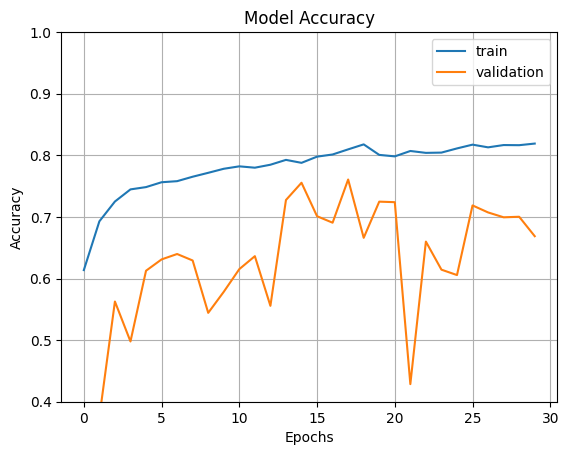

In [20]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

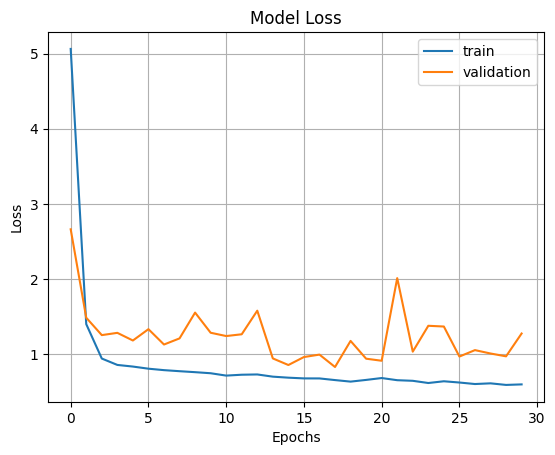

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [22]:
# Evaluate the model on the test set
test_loss, test_accuracy = final_model.evaluate(test_set)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

164/164 ━━━━━━━━━━━━━━━━━━━━ 587s 4s/step - accuracy: 0.7102 - loss: 1.2046
Test Loss: 1.2205640077590942
Test Accuracy: 0.7002288103103638


In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [24]:
def get_labels_and_predictions(generator, model):
    true_labels = []
    predictions = []

    # Iterate over the generator
    for i in range(len(generator)):
        x_batch, y_batch = generator[i]
        y_pred = model.predict(x_batch)

        true_labels.extend(np.argmax(y_batch, axis=1))  # Assuming y_batch is one-hot encoded
        predictions.extend(np.argmax(y_pred, axis=1))

    return np.array(true_labels), np.array(predictions)


In [25]:
def plot_confusion_matrix(cm, title='Confusion Matrix'):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

In [26]:
# Get true labels and predictions for the training set
true_labels_train, predictions_train = get_labels_and_predictions(training_set, final_model)

# Get true labels and predictions for the test set
true_labels_test, predictions_test = get_labels_and_predictions(test_set, final_model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━

In [27]:
# Compute the confusion matrices
cm_train = confusion_matrix(true_labels_train, predictions_train)
cm_test = confusion_matrix(true_labels_test, predictions_test)

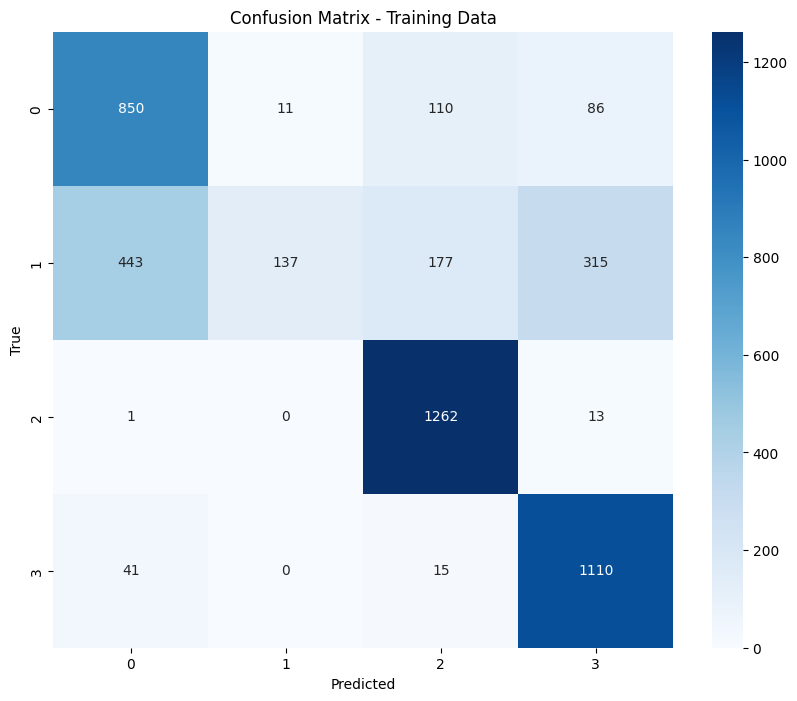

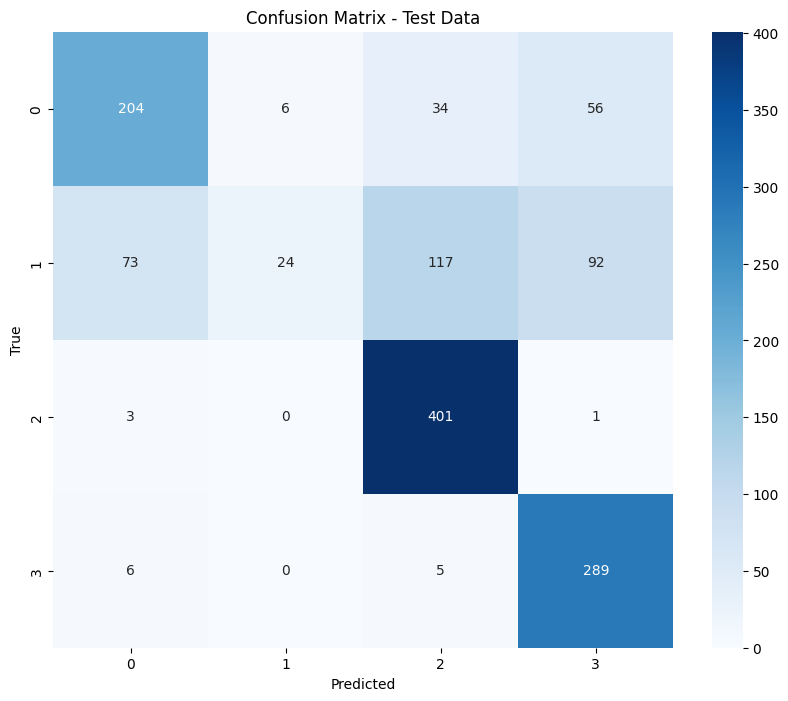

In [28]:
# Plot the confusion matrices
plot_confusion_matrix(cm_train, title='Confusion Matrix - Training Data')
plot_confusion_matrix(cm_test, title='Confusion Matrix - Test Data')

In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [30]:
# For training data
precision_train = precision_score(true_labels_train, predictions_train, average='weighted')
recall_train = recall_score(true_labels_train, predictions_train, average='weighted')
f1_train = f1_score(true_labels_train, predictions_train, average='weighted')

print(f'Training Precision: {precision_train}')
print(f'Training Recall: {recall_train}')
print(f'Training F1 Score: {f1_train}')

# For test data
precision_test = precision_score(true_labels_test, predictions_test, average='weighted')
recall_test = recall_score(true_labels_test, predictions_test, average='weighted')
f1_test = f1_score(true_labels_test, predictions_test, average='weighted')

print(f'Test Precision: {precision_test}')
print(f'Test Recall: {recall_test}')
print(f'Test F1 Score: {f1_test}')

Training Precision: 0.7753628966761846
Training Recall: 0.7348501422008313
Training F1 Score: 0.6756225461535146
Test Precision: 0.7233425896909654
Test Recall: 0.700228832951945
Test F1 Score: 0.6294337819104753
